### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a **"dock"** which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.**


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goals

You are required to model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features.
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Packages for calculations and data preprocessing
import numpy as np
import pandas as pd

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Added below to supress unwanted warnings related to deprecations etc.
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Read input data
bike_df = pd.read_csv(r"day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Rows and Columns of the dataset
bike_df.shape

(730, 16)

In [4]:
# Datatypes of variables in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Dictionary

- instant: record index
- dteday : date
- season : season **(1:spring, 2:summer, 3:fall, 4:winter)**
- yr : year **(0: 2018, 1:2019)**
- mnth : month **(1 to 12)**
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is **neither weekend nor holiday is 1, otherwise is 0.**
- weathersit : 
    1. **Clear, Few clouds, Partly cloudy, Partly cloudy**
    2. **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**
    3. **Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**
    4. **Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**
- temp : temperature in **Celsius**
- atemp: feeling temperature in **Celsius**
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data Cleaning and Pre-processing

In [5]:
# Check for missing values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Since there're no null values in the dataset hence no null-value treatment is required

#### Check for duplicate rows

In [6]:
len(bike_df[bike_df.duplicated()])

0

No Duplicate rows were found

### Exploratory Data Analysis

In [7]:
# Check for unique values within each column
bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### From a basic glimpse of the dataset dropped the following columns
1. **instant**: It's just the index having sequential values and is no significance in the dataset 
2. **dteday**: It's just the date and dataset has extra column **'yr'** and **'mnth'** to provide additional info related to datetime
3. **casual**: It's a count of casual users and it is already present in the **'cnt'** variable
4. **registered**: It's a count of registered users and it is already present in the **'cnt'** variable

In [8]:
# Drop columns 'instant' & 'dteday'
bike_df_1 = bike_df.copy().drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike_df_1.shape

(730, 12)

In [10]:
categorical_vars = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
continuous_vars = ["temp", "atemp", "hum", "windspeed"]
target = ["cnt"]

print("list of categorical variable(s) : ", categorical_vars)
print("list of continuous variable(s) : ", continuous_vars)
print("list of target variable(s) : ", target)

# Added assertion to check if the total columns(categorical, continuous and target) are equal to total columns present in the dataset
assert len(categorical_vars + continuous_vars + target) == len(bike_df_1.columns), "Total number of Continuous, categorical and target variables are not equal to total number of columns in the dataset"

# Check if all columns are present within the dataset
assert list(bike_df_1.columns) == categorical_vars + continuous_vars + target, "All columns are not present within the dataset"

list of categorical variable(s) :  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
list of continuous variable(s) :  ['temp', 'atemp', 'hum', 'windspeed']
list of target variable(s) :  ['cnt']


### Data Understanding and Pre-Processing

The following variables have been mapped as per data analysis:

- **'season'** - {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
- **'yr'** - {0: 2018, 1: 2019}
- **'mnth'** - {1 to 12} mapped to their corresponding month name as {1: 'January', 2: 'February' and so on}
- **'weekday'** - {0 to 6} mapped to their corresponding day name as {0: 'Sunday', 1: 'Monday' and so on}
- **'weathersit'** - mapped as per data dictionary
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
# Create a copy of bike_1 dataset to map variables
bike_df_2 = bike_df_1.copy()

In [12]:
# Mapping season variable
season_dictionary = {
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
}
bike_df_2.season = bike_df_2.season.map(season_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    bike_df_1.season.value_counts(dropna=False).values,
    bike_df_2.season.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", bike_df_1.season.value_counts(dropna=False))
print()
print("Values after mapping \n\n", bike_df_2.season.value_counts(dropna=False))

Values before mapping 

 season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Values after mapping 

 season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64


In [13]:
# Mapping yr variable
yr_dictionary = {
    0: 2018,
    1: 2019
}
bike_df_2.yr = bike_df_2.yr.map(yr_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    bike_df_1.yr.value_counts(dropna=False).values,
    bike_df_2.yr.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", bike_df_1.yr.value_counts(dropna=False))
print()
print("Values after mapping \n\n", bike_df_2.yr.value_counts(dropna=False))

Values before mapping 

 yr
0    365
1    365
Name: count, dtype: int64

Values after mapping 

 yr
2018    365
2019    365
Name: count, dtype: int64


In [14]:
# Mapping mnth variable
mnth_dictionary = {
    1: "January", 2: "February", 3: "March",
    4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September",
    10: "October",11: "November", 12: "December"
}
bike_df_2.mnth = bike_df_2.mnth.map(mnth_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    bike_df_1.mnth.value_counts(dropna=False).values,
    bike_df_2.mnth.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", bike_df_1.mnth.value_counts(dropna=False))
print()
print("Values after mapping \n\n", bike_df_2.mnth.value_counts(dropna=False))

Values before mapping 

 mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Values after mapping 

 mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64


In [15]:
# Mapping weekday variable
weekday_dictionary = {
    0: "Sunday", 1: "Monday", 2: "Tuesday",
    3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"    
}
bike_df_2.weekday = bike_df_2.weekday.map(weekday_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    bike_df_1.weekday.value_counts(dropna=False).values,
    bike_df_2.weekday.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", bike_df_1.weekday.value_counts(dropna=False))
print()
print("Values after mapping \n\n", bike_df_2.weekday.value_counts(dropna=False))

Values before mapping 

 weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

Values after mapping 

 weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64


In [16]:
# Mapping weathersit variable
weathersit_dictionary = {
    1: "Clear or Partly cloudy sky",
    2: "Misty and Cloudy sky",
    3: "Light Rain or Snowy",
    4: "Heavy Rain or Snowy",
}
bike_df_2.weathersit = bike_df_1.weathersit.map(weathersit_dictionary)

# High level Assertion check for mapping
np.testing.assert_array_equal(
    bike_df_1.weathersit.value_counts(dropna=False).values,
    bike_df_2.weathersit.value_counts(dropna=False).values
)

# Mapping check
print("Values before mapping \n\n", bike_df_1.weathersit.value_counts(dropna=False))
print()
print("Values after mapping \n\n", bike_df_2.weathersit.value_counts(dropna=False))

Values before mapping 

 weathersit
1    463
2    246
3     21
Name: count, dtype: int64

Values after mapping 

 weathersit
Clear or Partly cloudy sky    463
Misty and Cloudy sky          246
Light Rain or Snowy            21
Name: count, dtype: int64


In [17]:
bike_df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,Misty and Cloudy sky,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Sunday,0,Misty and Cloudy sky,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Monday,1,Clear or Partly cloudy sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Tuesday,1,Clear or Partly cloudy sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Wednesday,1,Clear or Partly cloudy sky,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

#### Univariate Analysis

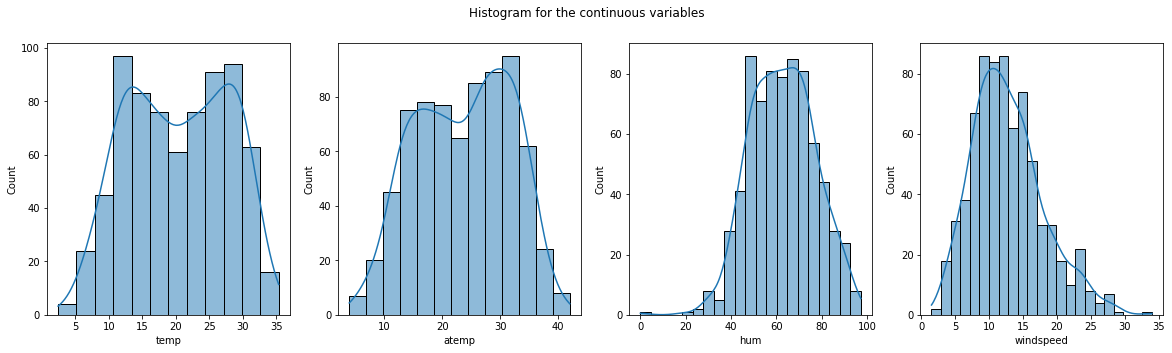

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = len(continuous_vars), figsize = (20, 5))
for i, continuous_var in zip(range(0,len(continuous_vars)), continuous_vars):
    sns.histplot(bike_df_2[continuous_var], ax = ax[i], kde = True)

plt.suptitle("Histogram for the continuous variables")
plt.show()

#### Observations as per Univariate Analysis of Continuous Variables
- Bikes were mainly rented around an avg temp of around $20^{o} C$
- The avg feeling temperature (atemp) during which bike were rented is approximately $24^{o} C$
- The avg humidity during which bike were rented is approximately 62
- The average windspeed during bike rentals is approximately 12

In [19]:
categorical_plot_config_dict = {
    'season': {'rotation': 0},
    'yr': {'rotation': 0},
    'mnth': {'rotation': 90},
    'holiday': {'rotation': 0},
    'weekday': {'rotation': 90},
    'workingday': {'rotation': 0},
    'weathersit': {'rotation': 90}
}

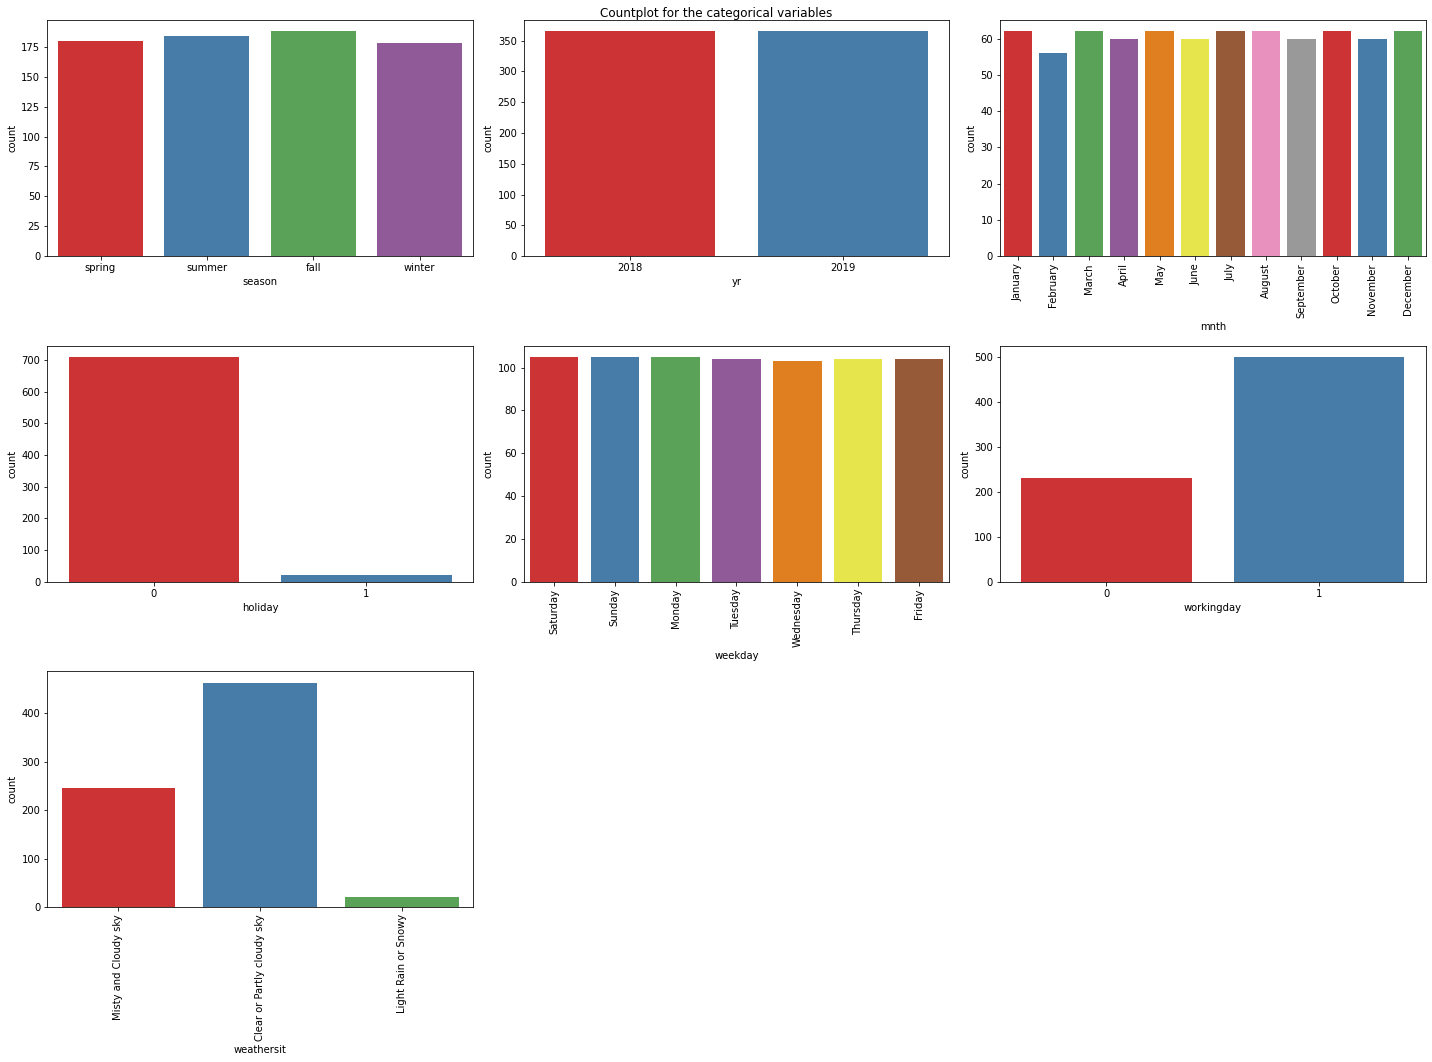

In [20]:
plt.figure(figsize = (20, 15))
plt.suptitle("Countplot for the categorical variables")
for i, categorical_var in enumerate(categorical_plot_config_dict):
    plt.subplot(3, 3, i+1)
    plt.xticks(rotation=categorical_plot_config_dict[categorical_var]["rotation"])
    sns.countplot(x = bike_df_2[categorical_var], palette = "Set1")

plt.tight_layout()    
plt.show()

#### Observations as per Univariate Analysis of Categorical Variables
- **Bikes are mainly rented during Clear or Partly cloudy sky and least in Light Rain or Snowy weather**.
- **Bike are mainly rented during on working days and non-holidays**.
- **There's slight/minimal variation in other categorical variables namely weekday, mnth and season**

#### Bi-Variate Analysis

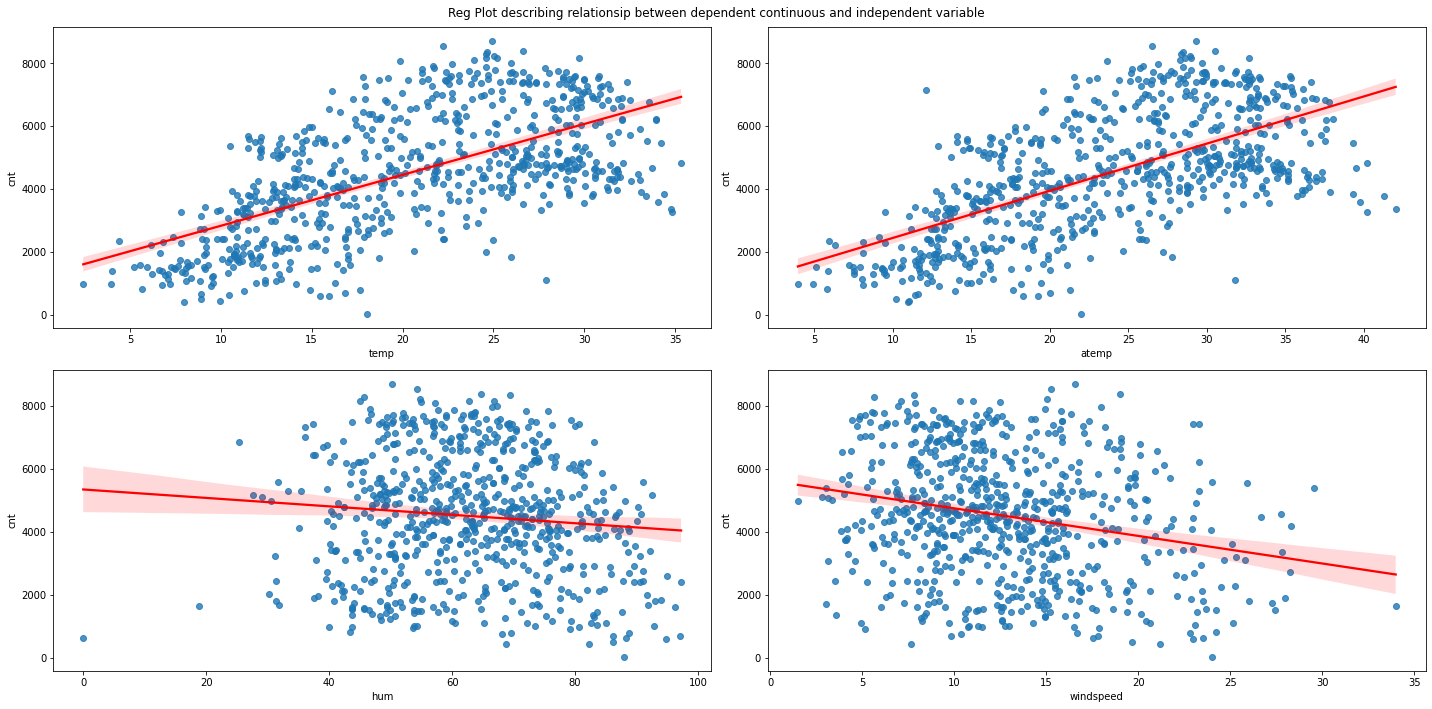

In [21]:
# Reg plot between continuous dependent variables and independent variable "cnt"
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.suptitle("Reg Plot describing relationsip between dependent continuous and independent variable")

continuous_var = 0
for i in range(2):
    for j in range(2):
        sns.regplot(
            x=bike_df_2[continuous_vars[continuous_var]],
            y=bike_df_2[target[0]],
            ax=ax[i,j],
            line_kws={"color":"red"}
        )
        continuous_var += 1

plt.tight_layout()
plt.show()

#### Observations as per Bi-variate Analysis of Continuous Variables
- Bikes demand is directly related to temp and atemp 
- Bikes demand is indirectly related to humidity and windspeed 

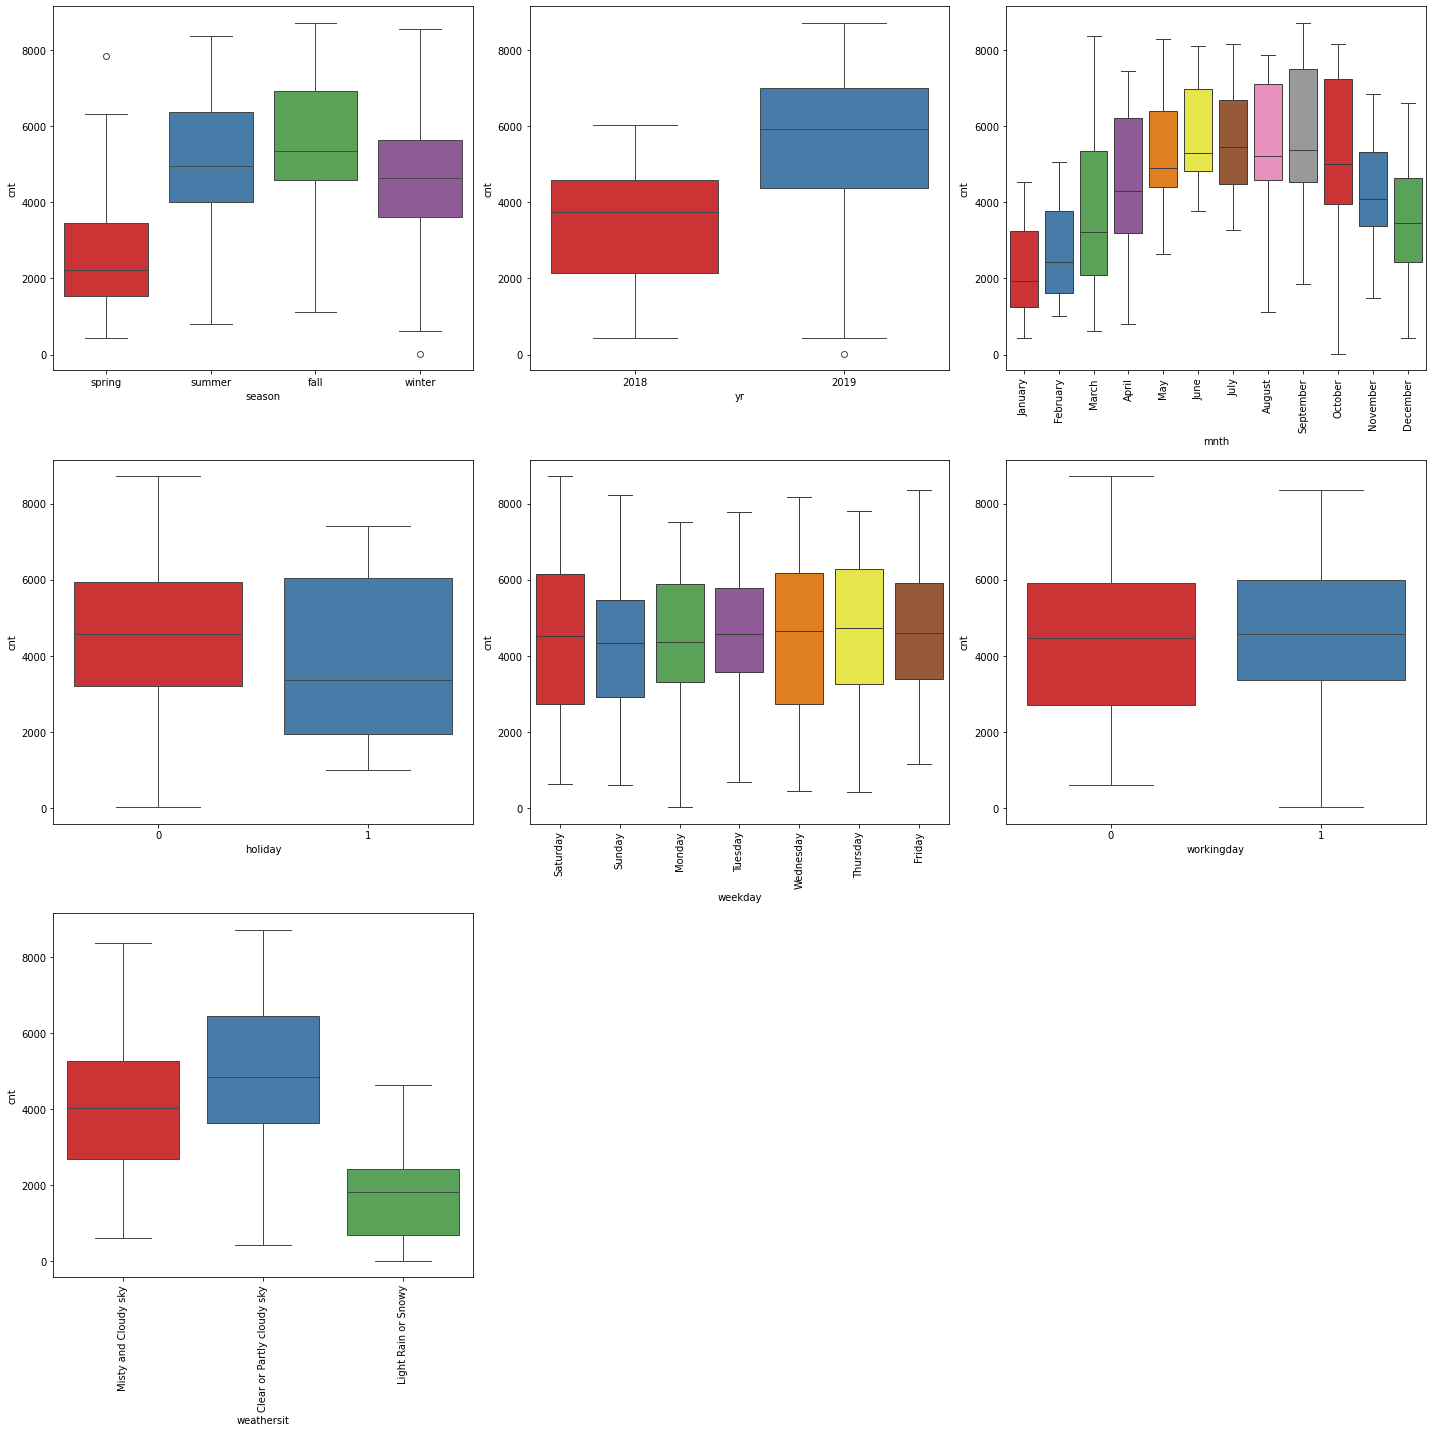

In [22]:
# Draw boxplot for categorical variables against a dependent variable `cnt`
plt.figure(figsize = (20, 20))
for i, categorical_var in enumerate(categorical_plot_config_dict):
    plt.subplot(3, 3, i+1)
    plt.xticks(rotation=categorical_plot_config_dict[categorical_var]["rotation"])
    sns.boxplot(data=bike_df_2, x = categorical_var, y = target[0], palette = "Set1")

plt.tight_layout()    
plt.show()

#### Observations as per Bi-Variate Analysis of Categorical Variables
- **Maximum demand of bikes is in the fall and minimum in spring season**.
- **Bikes demand is more in the year 2019 as compared to 2018.**
- **Bikes display most demand during the months of May till October with highest in September.**
- **Bikes are slightly more in demand on holidays than on working days.**
- **Bikes are majorly more in demand on Saturday, Thursday, Wednesday showing that they have used for mixed purposes namely office and travel.**
- **Bike demand is almost same irrespective of working day or not.**
- **Bikes are demanded mostly when the sky is clear or partly cloudy.**

#### Multivariate Analysis

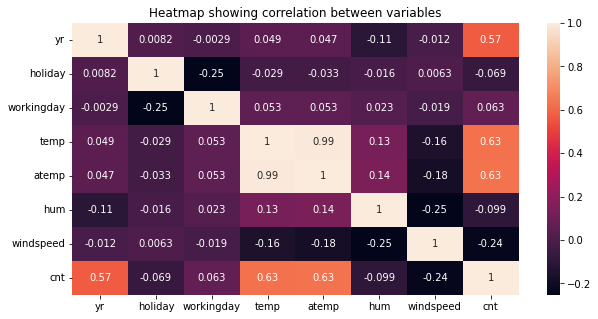

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(bike_df_2.corr(numeric_only = True), annot=True)

plt.title("Heatmap showing correlation between variables")
plt.show()

#### Observations as per Multivariate Analysis of Categorical Variables
- **Inverse correlation between cnt and other variables namely holiday, humidity, windspeed**
- **Positive correlation between cnt and other variables namely yr, workingday, temp, atemp**
- **High corelation between temp and atemp which again confirms our initial observation that they are almost same**.

### Dummy Variable Creation (One Hot Encoding)

In [24]:
# Creating a copy of Model Ready Data (MRD). Here calling it pre_mrd since dummy variables are not yet created
pre_mrd = bike_df_2.copy()
pre_mrd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Saturday,0,Misty and Cloudy sky,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Sunday,0,Misty and Cloudy sky,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Monday,1,Clear or Partly cloudy sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Tuesday,1,Clear or Partly cloudy sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Wednesday,1,Clear or Partly cloudy sky,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# columns for which we need to create dummy variables
dummy_vars = ["season", "mnth", "weekday", "weathersit"]
dummy_vars

['season', 'mnth', 'weekday', 'weathersit']

In [26]:
# Final Model Ready Data (MRD)
mrd = pre_mrd.copy()

for dummy_var in dummy_vars:
    dummy_df = pd.get_dummies(
        pre_mrd[dummy_var], drop_first=True, dtype=int
    ) # Added dtype here since latest version of pandas returns boolean values for dummies
    mrd = pd.concat([mrd, dummy_df], axis=1).drop(columns=[dummy_var], axis=1)

mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   spring                730 non-null    int32  
 9   summer                730 non-null    int32  
 10  winter                730 non-null    int32  
 11  August                730 non-null    int32  
 12  December              730 non-null    int32  
 13  February              730 non-null    int32  
 14  January               730 non-null    int32  
 15  July                  7

#### Our Model Ready Data (MRD) has 730 rows and 30 columns

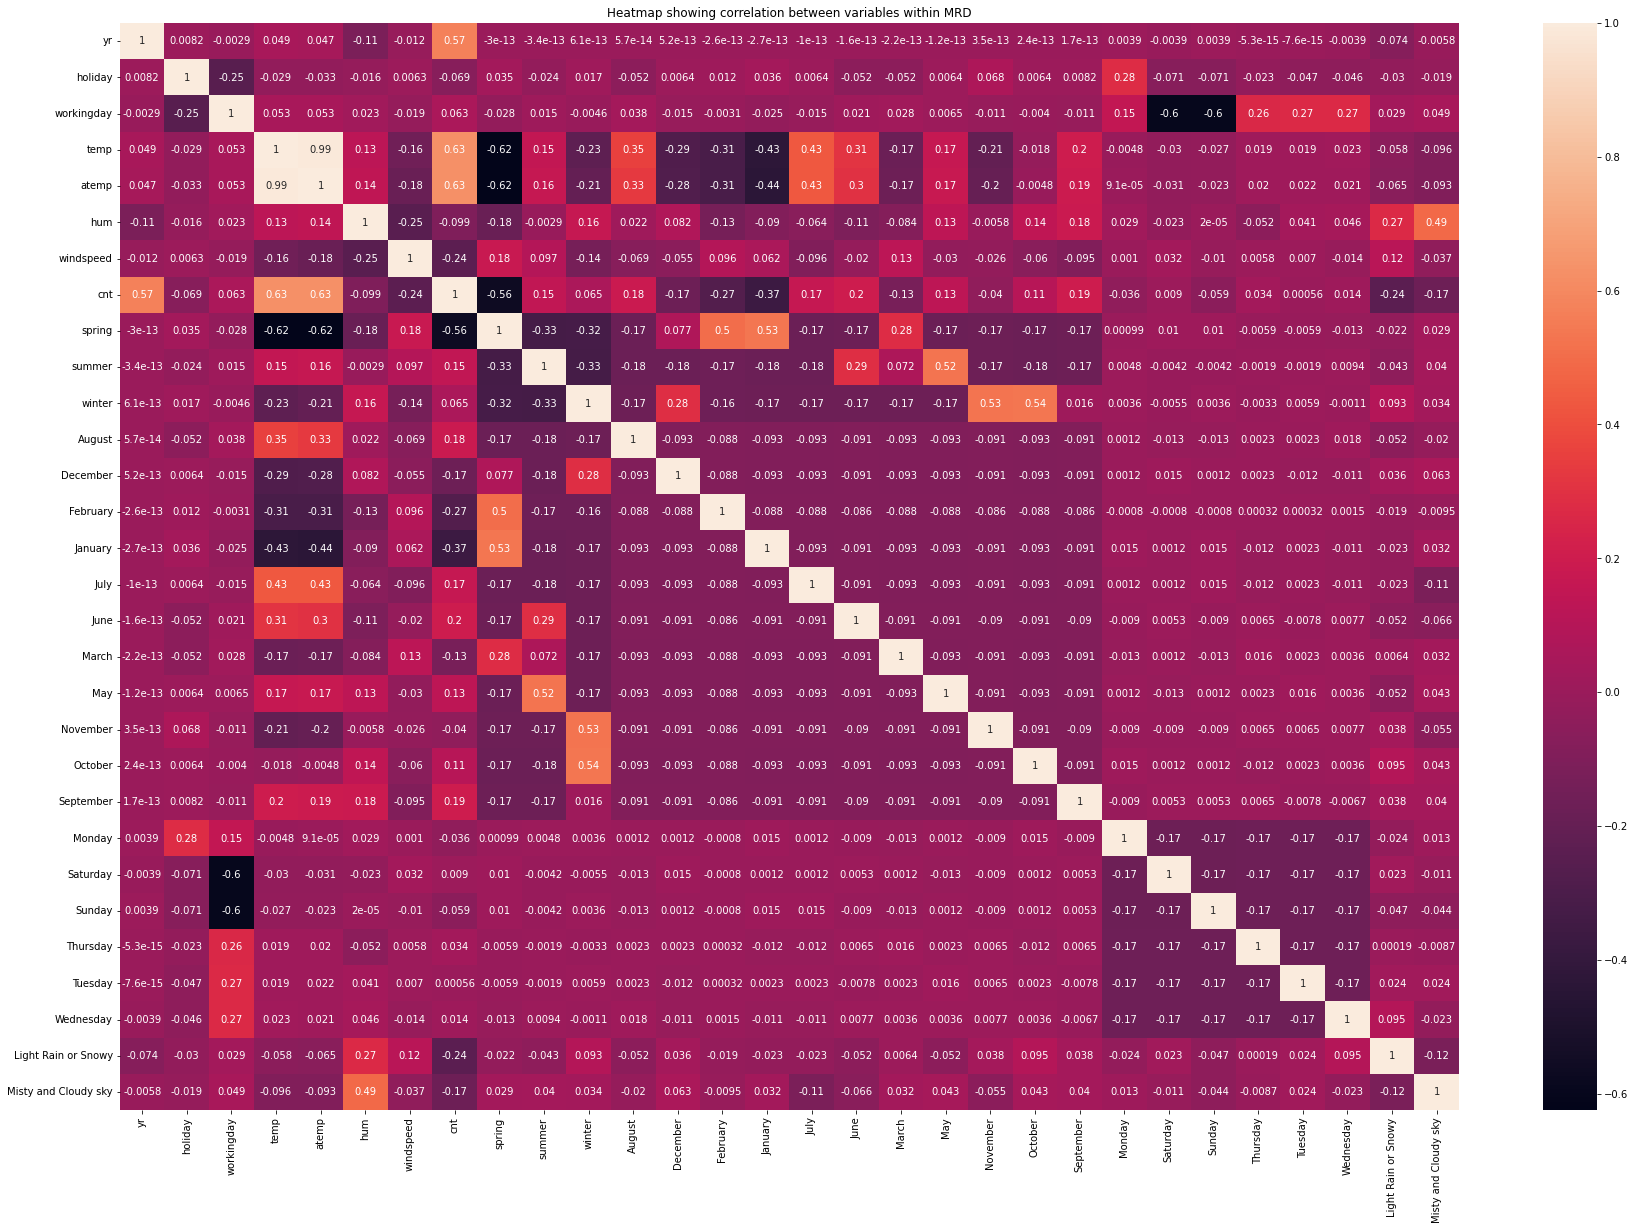

In [27]:
### Correlation between variables in MRD
plt.figure(figsize=(30, 20))
sns.heatmap(mrd.corr(numeric_only = True), annot=True)

plt.title("Heatmap showing correlation between variables within MRD")
plt.show()

### Split Datasets into train and test

In [28]:
X = mrd.copy().drop("cnt", axis=1)
y = mrd["cnt"].copy()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
print(f"Shape of Independent Variables Train Dataset {X_train.shape}")
print(f"Shape of Independent Variables Test Dataset {X_test.shape}")
print(f"Shape of Dependent Variable Train Dataset {y_train.shape}")
print(f"Shape of Dependent Variable Test Dataset {y_test.shape}")

Shape of Independent Variables Train Dataset (511, 29)
Shape of Independent Variables Test Dataset (219, 29)
Shape of Dependent Variable Train Dataset (511,)
Shape of Dependent Variable Test Dataset (219,)


### Scaling of Data using Standardized Scaling

In [31]:
scaler = StandardScaler()

# Scaling and transforming Train Dataset
model_train = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(model_train.transform(X_train), columns=X_train.columns, index=X_train.index)

# Scaling Test Dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Feature Selection

In [32]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

In [33]:
# Observation of results
rfe_df = pd.DataFrame(
    dict(
        variable = X_train_scaled.columns,
        rfe_support = rfe.support_,
        rfe_ranking = rfe.ranking_
    )
)
rfe_df = rfe_df[rfe_df.rfe_support == True]
rfe_df

,variable,rfe_support,rfe_ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
5,hum,True,1
6,windspeed,True,1
7,spring,True,1
8,summer,True,1
9,winter,True,1
14,July,True,1


### Modelling

In [34]:
rfe_df_cols = rfe_df.variable.values
rfe_df_cols

array(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'July', 'September', 'Saturday',
       'Sunday', 'Light Rain or Snowy', 'Misty and Cloudy sky'],
      dtype=object)

In [35]:
def perform_linear_regression(x_df: pd.DataFrame, y_df: pd.DataFrame) -> tuple :
    """
    Function to add constant and perform linear regression.
    It prints summary of Linear Regression.
    """
    
    x_df_sm = sm.add_constant(x_df)
    lm = sm.OLS(y_df, x_df_sm).fit()
    print(lm.summary())
    
    return lm, x_df_sm

In [36]:
def calc_vif(input_df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate Variance Inflation Factor (VIF) for the independent variables.
    It returs a pandas dataframe where variables are sorted in decreasing order of their VIF
    """
    
    vif_df = pd.DataFrame(
        dict(
            feature=[],
            vif=[]
        )
    )
    
    vif_df["feature"] = input_df.columns
    vif_df["vif"] = [round(variance_inflation_factor(input_df.values, i), 2) for i in range(len(input_df.columns))]
    
    return vif_df.sort_values(by="vif", ascending=False).reset_index().drop(columns="index", axis=1)

#### Iteration 1

In [37]:
X_train_scaled_1 = X_train_scaled[rfe_df_cols]
lm_result, X_train_sm_1 = perform_linear_regression(X_train_scaled_1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          7.31e-192
Time:                        15:45:55   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [38]:
calc_vif(X_train_scaled_1)

,feature,vif
0,holiday,inf
1,workingday,inf
2,Saturday,inf
3,Sunday,inf
4,spring,5.02
5,temp,3.62
6,winter,3.50
7,summer,2.62
8,hum,1.91
9,Misty and Cloudy sky,1.56


#### Observations from the Iteration 1 of Regression
- The **$R^{2}$** value is **84.7%**
- The **Adjusted $R^{2}$** value is **84.3%**
- **VIF** for variables **'holiday', 'workingday', 'Saturday', 'Sunday' is infinite**
- **p-value** for the variables is within acceptable limit.
- Thus will drop variables based upon VIF one at a time and proceed further

#### Iteration 2

In [39]:
X_train_scaled_2 = X_train_scaled_1.drop(columns="holiday")
lm_result, X_train_sm_2 = perform_linear_regression(X_train_scaled_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          7.31e-192
Time:                        15:45:55   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [40]:
calc_vif(X_train_scaled_2)

,feature,vif
0,workingday,9.08
1,Saturday,6.06
2,Sunday,5.74
3,spring,5.02
4,temp,3.62
5,winter,3.50
6,summer,2.62
7,hum,1.91
8,Misty and Cloudy sky,1.57
9,July,1.49


#### Observations from the Iteration 2 of Regression
- The **$R^{2}$** value is **84.7%** which is same as previous
- The **Adjusted $R^{2}$** value is **84.3%** which is same as previous
- **VIF** for variables **'workingday', 'Saturday', 'Sunday', 'spring' is high (>5)**
- **p-value** for the variables is within acceptable limit.
- Thus will drop variables one at a time based upon highest VIF and proceed further

#### Iteration 3

In [41]:
X_train_scaled_3 = X_train_scaled_2.drop(columns="workingday")
lm_result, X_train_sm_3 = perform_linear_regression(X_train_scaled_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.50e-189
Time:                        15:45:55   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     497   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [42]:
calc_vif(X_train_scaled_3)

,feature,vif
0,spring,5.02
1,temp,3.61
2,winter,3.49
3,summer,2.62
4,hum,1.91
5,Misty and Cloudy sky,1.57
6,July,1.49
7,September,1.29
8,Light Rain or Snowy,1.25
9,windspeed,1.20


#### Observations from the Iteration 3 of Regression
- The **$R^{2}$** value is now **84.2%**
- The **Adjusted $R^{2}$** value is **83.8%**
- **VIF** for variables **'spring'** is high (>5)
- **p-value** for the variable **'Saturday'** is outside of acceptable limit.
- Thus will now drop variables one at a time based upon highest p-value and will run iterations

#### Iteration 4

In [43]:
X_train_scaled_4 = X_train_scaled_3.drop(columns="Saturday")
lm_result, X_train_sm_4 = perform_linear_regression(X_train_scaled_4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.02e-190
Time:                        15:45:55   Log-Likelihood:                -4125.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     498   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [44]:
calc_vif(X_train_scaled_4)

,feature,vif
0,spring,5.02
1,temp,3.61
2,winter,3.49
3,summer,2.62
4,hum,1.90
5,Misty and Cloudy sky,1.57
6,July,1.49
7,September,1.29
8,Light Rain or Snowy,1.25
9,windspeed,1.19


#### Observations from the Iteration 4 of Regression
- The **$R^{2}$** value is now **84%**
- The **Adjusted $R^{2}$** value is **83.6%**
- **VIF** for variables **'spring'** is high (>5)
- **p-value** for the variables is within acceptable limit. 
- Thus will now drop variables one at a time based upon highest VIF and run iterations

#### Iteration 5

In [45]:
X_train_scaled_5 = X_train_scaled_4.drop(columns="spring")
lm_result, X_train_sm_5 = perform_linear_regression(X_train_scaled_5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.49e-190
Time:                        15:45:55   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     499   BIC:                             8334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [46]:
calc_vif(X_train_scaled_5)

,feature,vif
0,hum,1.88
1,temp,1.60
2,Misty and Cloudy sky,1.55
3,July,1.43
4,summer,1.33
5,winter,1.29
6,Light Rain or Snowy,1.24
7,September,1.19
8,windspeed,1.18
9,yr,1.03


#### Observations from the Iteration 5 of Regression
- The **$R^{2}$** value is now **83.9%**
- The **Adjusted $R^{2}$** value is **83.6%** as same as last iteration
- **VIF** for variables is now under limit i.e < 5
- **p-value** for the variables is within acceptable limit. 
- Thus will now drop variables based upon highest p-value and run iterations to check if there's any impact in regression summary

#### Iteration 6

In [47]:
X_train_scaled_6 = X_train_scaled_5.drop(columns="July")
lm_result, X_train_sm_6 = perform_linear_regression(X_train_scaled_6, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          6.02e-190
Time:                        15:45:55   Log-Likelihood:                -4132.7
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     500   BIC:                             8334.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4491.3033 

In [48]:
calc_vif(X_train_scaled_6)

,feature,vif
0,hum,1.87
1,Misty and Cloudy sky,1.55
2,temp,1.27
3,winter,1.25
4,Light Rain or Snowy,1.24
5,summer,1.19
6,windspeed,1.18
7,September,1.11
8,yr,1.03
9,Sunday,1.01


#### Observations from the Iteration 6 of Regression
- The **$R^{2}$** value is now **83.7%**
- The **Adjusted $R^{2}$** value is **83.4%** as same as last iteration
- **VIF** for variables is now under limit i.e < 5
- **p-value** for the variables is within acceptable limit.
- **Probability of F-statistic** is also within limit.

Based upon the above summary our model can be said to be valid.

### Residual Analysis

#### Check for Normal Distribution of Errors

In [49]:
y_train_pred = lm_result.predict(X_train_sm_6)
y_train_pred

653    6395.862643
576    6540.480005
426    4368.399806
728    3002.642224
482    5239.554807
          ...     
578    6977.636401
53     2159.581796
350    2423.360033
79     2646.543996
520    5795.065656
Length: 511, dtype: float64

In [50]:
# residuals = y_train - y_pred
residuals = y_train - y_train_pred
print("Mean value of Residuals: {0:.20f}".format(residuals.mean()))

Mean value of Residuals: 0.00000000000271602527


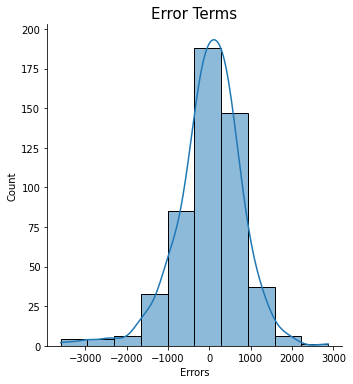

In [51]:
# Plot the histogram of the error terms on the training set
sns.displot(residuals, bins = 10, kde = True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 10)
plt.show()

#### Observations:
- Mean of Residuals is very close to 0 i.e 0.00000000000271602527
- As from the graph above, it's proved the assumption of normal distribution of errors

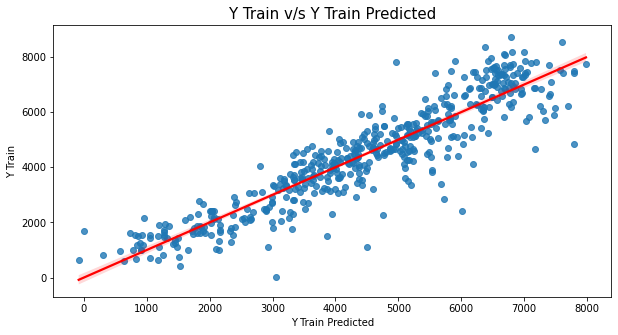

In [52]:
plt.figure(figsize = (10, 5))

sns.regplot(
    y=y_train,
    x=y_train_pred,
    line_kws={"color":"red"}
)

plt.ylabel('Y Train', fontsize = 10)
plt.xlabel('Y Train Predicted', fontsize = 10)
plt.title("Y Train v/s Y Train Predicted", fontsize = 15)
plt.show()

#### Observations:
- The above graph is evenly distributed.
- It shows almost constant variance of predictions thereby validates the concept of Homoscedasticity

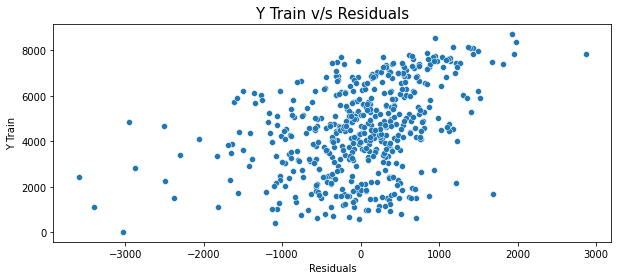

In [53]:
plt.figure(figsize = (10, 4))

sns.scatterplot(
    y=y_train,
    x=residuals
)

plt.ylabel('Y Train', fontsize = 10)
plt.xlabel('Residuals', fontsize = 10)
plt.title("Y Train v/s Residuals", fontsize = 15)
plt.show()

#### Observations:
- Above graph shows that there's no correaltion between error terms 

### Model Predictions on Test Dataset

In [54]:
X_test_sm = sm.add_constant(X_test_scaled[X_train_scaled_6.columns])
X_test_sm

,const,yr,temp,hum,windspeed,summer,winter,September,Sunday,Light Rain or Snowy,Misty and Cloudy sky
184,1.0,-1.01777,1.306004,0.048287,-1.396242,-0.572078,-0.575091,-0.295354,-0.408248,-0.173902,1.379641
535,1.0,0.98254,1.614633,-0.276107,-0.986093,1.748015,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826
299,1.0,-1.01777,-0.112776,1.286864,0.078844,-0.572078,1.738857,-0.295354,-0.408248,-0.173902,1.379641
221,1.0,-1.01777,1.527113,-1.464546,0.110494,-0.572078,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826
152,1.0,-1.01777,1.241512,-2.307960,1.277902,1.748015,-0.575091,-0.295354,-0.408248,-0.173902,-0.724826
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.98254,-1.241352,0.402166,-0.197275,-0.572078,-0.575091,-0.295354,2.449490,-0.173902,1.379641
702,1.0,0.98254,-0.080533,0.726553,-0.220958,-0.572078,1.738857,-0.295354,-0.408248,-0.173902,-0.724826
127,1.0,-1.01777,0.209671,0.004052,-1.483030,1.748015,-0.575091,-0.295354,2.449490,-0.173902,-0.724826
640,1.0,0.98254,0.923669,1.151208,-1.585675,-0.572078,1.738857,-0.295354,-0.408248,-0.173902,1.379641


In [55]:
y_test_pred = lm_result.predict(X_test_sm)
y_test_pred

184    4568.054547
535    8117.292861
299    3518.560613
221    5175.002512
152    5507.926708
          ...     
400    2916.534172
702    6206.293865
127    4240.120160
640    7170.549782
72     2541.682485
Length: 219, dtype: float64

### Analysis of Predicted values on Test Dataset

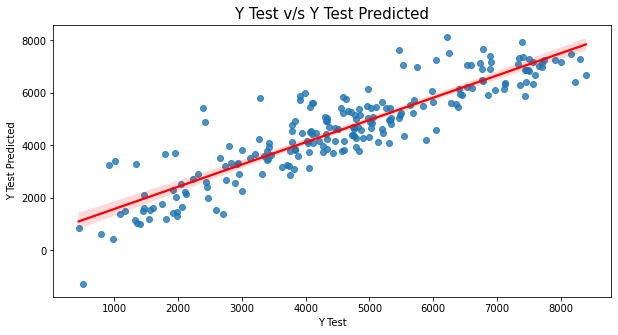

In [56]:
plt.figure(figsize = (10, 5))

sns.regplot(
    x=y_test,
    y=y_test_pred,
    line_kws={"color":"red"}
)

plt.xlabel('Y Test', fontsize = 10)
plt.ylabel('Y Test Predicted', fontsize = 10)
plt.title("Y Test v/s Y Test Predicted", fontsize = 15)
plt.show()

#### Observations:
- From the above graph it's clear that y test and y test predicted values have very strong remsblence and we conclude that our model is a good fit.

### Calculating $R^2$ Score

In [57]:
def calc_r2_score(y_true: pd.Series, y_pred:pd.Series)->float:
    """
    Helper function to return R2 score
    """
    return round(r2_score(y_true=y_true, y_pred=y_pred), 3)

In [58]:
r2_score_train = calc_r2_score(y_train, y_train_pred)
r2_score_test = calc_r2_score(y_test, y_test_pred)
abs_diff_r2_score = round(abs(r2_score_train - r2_score_test), 3)

In [59]:
print(f"R2 Score of train dataset: {r2_score_train}")
print(f"R2 Score of test dataset: {r2_score_test}")
print(f"Absolute Difference in R2 Score between train and test dataset: {abs_diff_r2_score}")

R2 Score of train dataset: 0.837
R2 Score of test dataset: 0.803
Absolute Difference in R2 Score between train and test dataset: 0.034


#### Observation:
**Since Absolute difference in $R^2$ Scores between Train and Test Dataset is approximately 0.03, our model is good fit.**

### Conclusion

#### Model Equation for Bike Demand
***cnt***   =  4491.3033 + (998.5631 * ***yr***)  +  (1125.0534 * ***temp***)  -  (213.0869 * ***hum***)  - (276.1097 * ***windspeed***)  +  (343.4570 * ***summer***)  +  (526.3388 * ***winter***)  + (239.1522 * ***September***)  - (131.7794 * ***Sunday***)  - (349.2905 * ***Light Rain or Snowy***)  - (214.7093 * ***Misty and Cloudy sky***)

### Business Recommendations
**Business can now use the above model for decision making.**
- Temperature is the most driving factor in the model as it has the highest coefficient value of 1125.0534. Thus for a unit increase in temperature the demand shall increase by factor of 1125.0534.
- Yearly growth of bike demand will increase as it has a high coefficient value.
- During winters and summers bike demand will increase more as per the above equation.
- During Light Rain or Snowy sky or during Misty and Cloudy sky demnad will decrease.
- During the month of September bike demand shall increase as it has a positive coefficient value

Thus boombikes can increase and monitor the bike demand accordingly based upon the above factors.